In [1]:
%load_ext autoreload
%autoreload 2
from envs.generate_maze import MazeGenerator
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
#plt.rcParams['text.usetex'] = True

## Plot environment

[[ 1  1  1  0  1  1  1]
 [ 1 -1 -1 -1 -1 -1  1]
 [ 1 -1 -1 -1 -1 -1  1]
 [ 0 -1 -1 -1 -1 -1  0]
 [ 1 -1 -1 -1 -1 -1  1]
 [ 1 -1 -1 -1 -1 -1  1]
 [ 1  1  1  0  1  1  1]]


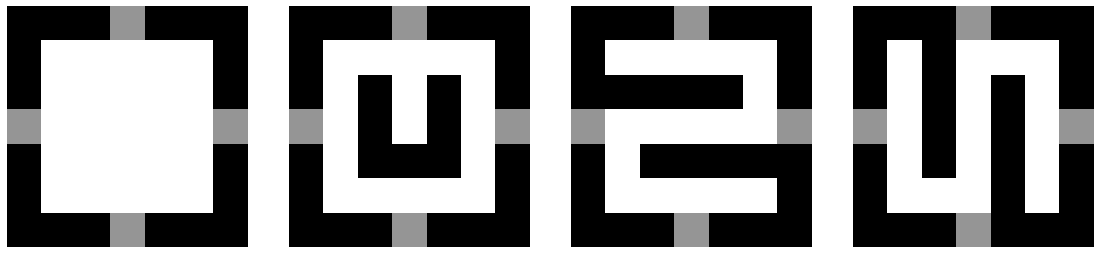

In [2]:
def add_doors(r):
    # door locations are (0, 3) (3, 0) (6, 3) (3, 6)
    r[0, 3] = 0
    r[3, 0] = 0
    r[6, 3] = 0
    r[3, 6] = 0
    return r
# first plot the different room profiles
gen = MazeGenerator(32, 32, 7, 7)
r0 = gen._get_room_profiles("")
r0 *= -2
r0 += 1
r0 = add_doors(r0)
print(r0)
r1 = gen._get_room_profiles("U")
r1 *= -2
r1 += 1
r1 = add_doors(r1)
r2 = gen._get_room_profiles("=")
r2 *= -2
r2 += 1
r2 = add_doors(r2)
r3 = gen._get_room_profiles("||")
r3 *= -2
r3 += 1
r3 = add_doors(r3)
fig, axes = plt.subplots(1,4, figsize=(16,4))
axes[0].imshow(r0, cmap="Greys")
axes[1].imshow(r1, cmap="Greys")
axes[2].imshow(r2, cmap="Greys")
axes[3].imshow(r3, cmap="Greys")
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
plt.tight_layout()
plt.savefig("figures/room_profiles.png")
plt.show()

In [5]:
def transform(r):
    r *= -1
    r[r==1] = -1
    return r
        
# the mazes with a single room profile

def simple_mazes(axes, patterns):
    gen = MazeGenerator(2, 2, 7, 7, patterns)
    r4 = transform(gen._get_maze())

    gen = MazeGenerator(4, 4, 7, 7, patterns)
    r16 = transform(gen._get_maze())

    gen = MazeGenerator(8, 8, 7, 7, patterns)
    r64 = transform(gen._get_maze())

    gen = MazeGenerator(16, 16, 7, 7, patterns)
    r256 = transform(gen._get_maze())

    gen = MazeGenerator(32, 32, 7, 7, patterns)
    r1024 = transform(gen._get_maze())

    mazes = [r4, r16, r64, r256, r1024]

    for i, m in enumerate(mazes):
        axes[i].imshow(m, cmap="Greys")
        axes[i].axis('off')
    
    #plt.tight_layout()
    #plt.savefig("figures/single_room_mazes.png")
    return axes

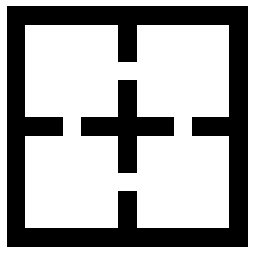

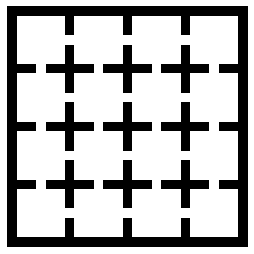

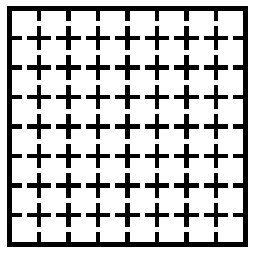

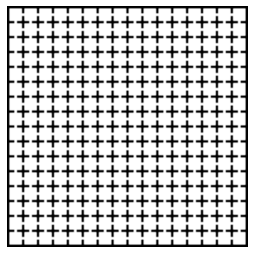

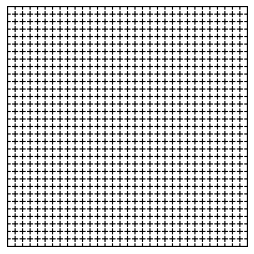

In [6]:
patterns = [""]

fig, ax = plt.subplots(1,1)
gen = MazeGenerator(2, 2, 7, 7, patterns)
r4 = transform(gen._get_maze())
ax.imshow(r4, cmap="Greys")
ax.axis('off')
plt.tight_layout()
plt.savefig("figures/marker2x2.png")

fig, ax = plt.subplots(1,1)
gen = MazeGenerator(4, 4, 7, 7, patterns)
r16 = transform(gen._get_maze())
ax.imshow(r16, cmap="Greys")
ax.axis('off')
plt.tight_layout()
plt.savefig("figures/marker4x4.png")

fig, ax = plt.subplots(1,1)
gen = MazeGenerator(8, 8, 7, 7, patterns)
r64 = transform(gen._get_maze())
ax.imshow(r64, cmap="Greys")
ax.axis('off')
plt.tight_layout()
plt.savefig("figures/marker8x8.png")

fig, ax = plt.subplots(1,1)
gen = MazeGenerator(16, 16, 7, 7, patterns)
r256 = transform(gen._get_maze())
ax.imshow(r256, cmap="Greys")
ax.axis('off')
plt.tight_layout()
plt.savefig("figures/marker16x16.png")

fig, ax = plt.subplots(1,1)
gen = MazeGenerator(32, 32, 7, 7, patterns)
r1024 = transform(gen._get_maze())
ax.imshow(r1024, cmap="Greys")
ax.axis('off')
plt.tight_layout()
plt.savefig("figures/marker32x32.png")

## Performance curves 

In [7]:
# plot the learning curves
def learning_curves(axes, num_profiles, smooth=30):
    
    path = 'results'
    models = ['baseline', 'compare_reward_functions/hrl_cumulated_reward']
    labels = ['Q-learning', 'SHQL']
    colors = ['red', 'blue']
    rooms = [2, 4, 8, 16, 32] # , 64]

    for i, r in enumerate(rooms):
        for im, m in enumerate(models):
            #to_load = f"{path}/{m}_{r}x{r}_rooms_7x7_cells_{num_profiles}_profiles_rooms.npy"
            to_load = f"{m}_{r}{r}{num_profiles}.npy"
            #print(f"reading:{to_load}")
            steps = np.load(f"{path}/{to_load}").squeeze()
            steps /= 1000
            mean = np.mean(steps[:, :], axis=0)
            smooth_mean = np.convolve(mean, (1/smooth)*np.ones((smooth,)),mode='valid')
            std = np.std(steps[:, :], axis=0)
            truncated_std = std[smooth//2-1:-smooth//2]
            if r == 32 and num_profiles == 4:
                steps = 5000
                print("5000")
            else:
                print('3000')
                steps = 3000
            truncated_steps = np.arange(smooth//2-1, steps-smooth//2)
            axes[i].plot(truncated_steps, smooth_mean, color=colors[im],
                         linewidth=3, alpha=0.7)
            axes[i].fill_between(truncated_steps, smooth_mean-truncated_std,
                                 smooth_mean+truncated_std, alpha=0.3,
                                 color=colors[im])
            axes[i].set_ylim(0, np.max(mean))
            if i == 2:
                axes[i].plot(truncated_steps, smooth_mean, label=labels[im], color=colors[im],
                         linewidth=3, alpha=0.7)
            if i == 0:
                axes[i].set_ylabel('steps (in thousands)')
                
            axes[i].yaxis.set_major_locator(plt.MaxNLocator(3))
                
            axes[i].set_xlabel('episodes')
    fig.legend(bbox_to_anchor=(0.5, 0.05), ncol=2, loc="center")
    #plt.tight_layout()
    #plt.savefig("figures/learning_curves.png")
    #plt.show()
    return axes

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000


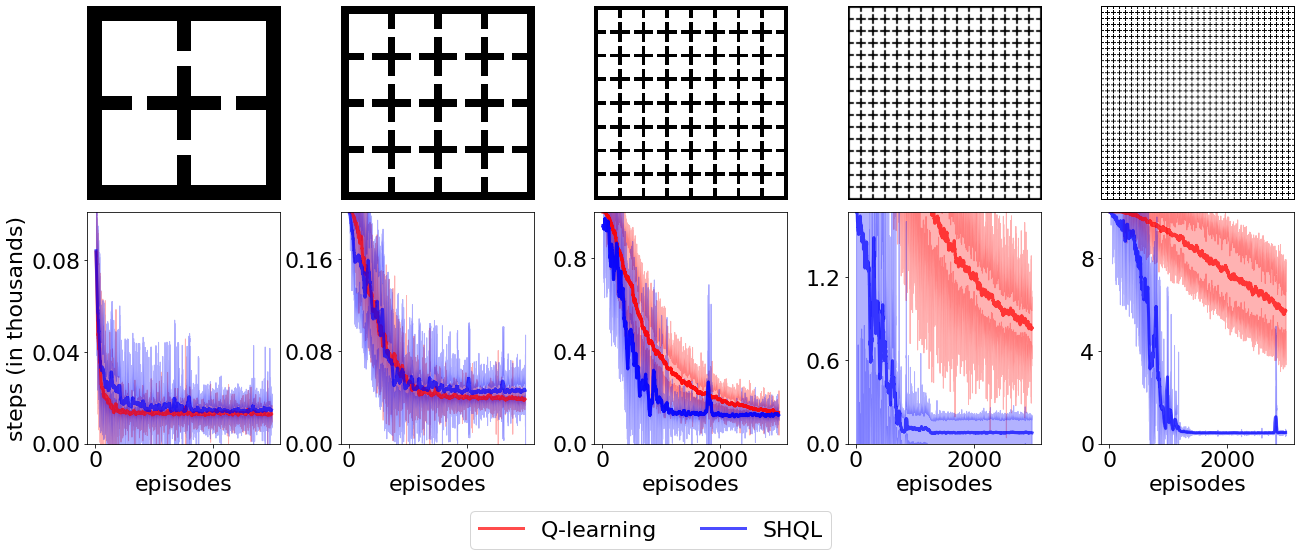

In [8]:
# make plot
patterns = ["", "U", "=", "||"]
patterns = [""]
fig, axes = plt.subplots(2, 5, figsize=(18,8))

simple_mazes(axes[0, :], patterns)
learning_curves(axes[1, :], len(patterns))
plt.tight_layout(pad=0.2)
fig.subplots_adjust(bottom=0.2)
plt.savefig(f"figures/{len(patterns)}_room_profile_performance.png")

### Compare the different reward functions for the high-level agent

We consider two different reward function for the high-level agent.
Either a fix penalty that penalize the high-level for each sub-goal issued unless it leads to the low-level agent to complete the task.
$$ \begin{align}
r_1(s, g) = \begin{cases} 0 & \text{if $s = g$} \\
-c & \text{otherwise} \end{cases}
\label{eq:reward-fn}
\end{align} $$

Or a reward that depends on the rewards accumulated by the low-level agent: 
$$ r_2 = \sum_{t=1}^{H_l} r_t$$

ValueError: x and y must have same first dimension, but have shapes (2971,) and (4971,)

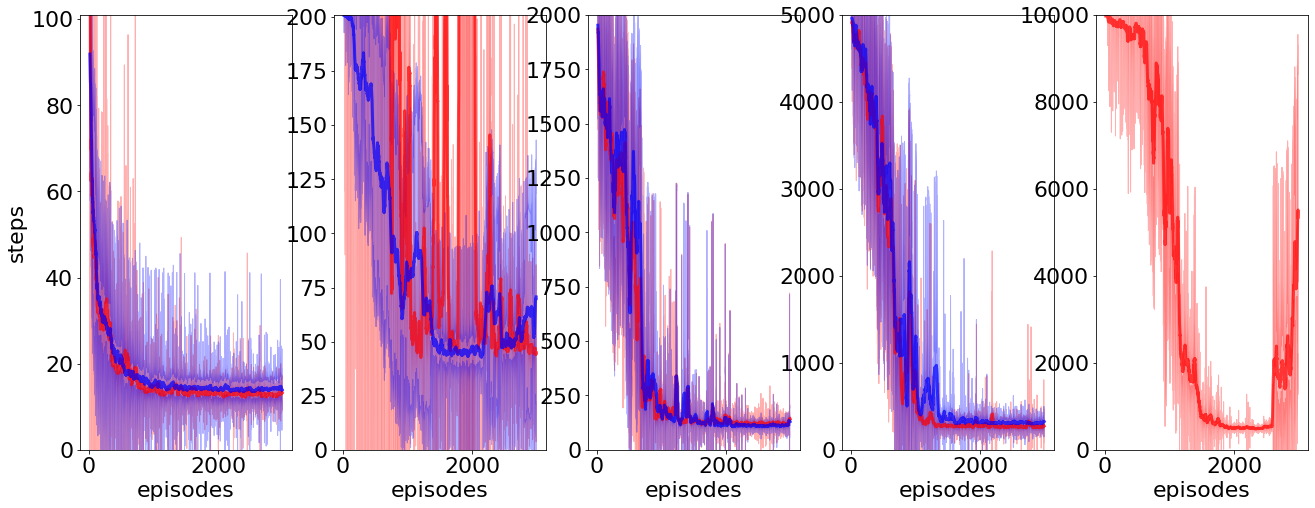

In [9]:
# plot the learning curves
def learning_curves(axes, num_profiles, smooth=30):
    path = 'results/compare_reward_functions'
    models = ['hrl_fix_reward', 'hrl_cumulated_reward']
    colors = ['red', 'blue']
    rooms = [2, 4, 8, 16, 32]
    for i, r in enumerate(rooms):
        for im, m in enumerate(models):
            #to_load = f"{path}/{m}_{r}x{r}_rooms_7x7_cells_{num_profiles}_profiles_rooms.npy"
            to_load = f"{m}_{r}{r}{num_profiles}.npy"
            #print(f"reading:{to_load}")
            steps = np.load(f"{path}/{to_load}").squeeze()
            mean = np.mean(steps[:, :], axis=0)
            smooth_mean = np.convolve(mean, (1/smooth)*np.ones((smooth,)),mode='valid')
            std = np.std(steps[:, :], axis=0)
            truncated_std = std[smooth//2-1:-smooth//2]
            truncated_steps = np.arange(smooth//2-1, 3000-smooth//2)
            axes[i].plot(truncated_steps, smooth_mean, label=models[im], color=colors[im],
                         linewidth=3, alpha=0.7)
            axes[i].fill_between(truncated_steps, smooth_mean-truncated_std,
                                 smooth_mean+truncated_std, alpha=0.3,
                                 color=colors[im])
            axes[i].set_ylim(0, np.max(mean))
            if i == 0:
                axes[i].set_ylabel('steps')
            axes[i].set_xlabel('episodes')
    fig.legend(bbox_to_anchor=(1,1), loc="upper left")
    #plt.tight_layout()
    #plt.savefig("figures/learning_curves.png")
    #plt.show()
    return axes

fig, axes = plt.subplots(1, 5, figsize=(22,8))
learning_curves(axes, 4)

### Plotting bounds (understand the landscape of MDPS)

We would like to quantify how empirical results are aligned with theory. To this end we are looking at the bound value for the different MDPs we consider.

Recall that the bound on $$\frac{\max(|\mathcal{S_l} \times \mathcal{A_h} \times \mathcal{A_l}|H_l^2, |\mathcal{S_h} \times \mathcal{A_h}|H_h^2)}{|\mathcal{S} \times \mathcal{A}|H^2} $$

Note that to simply the visualization we consider that some parameters goes by pair. It seems reasonable to augment the horizon as we augment the state space size. 


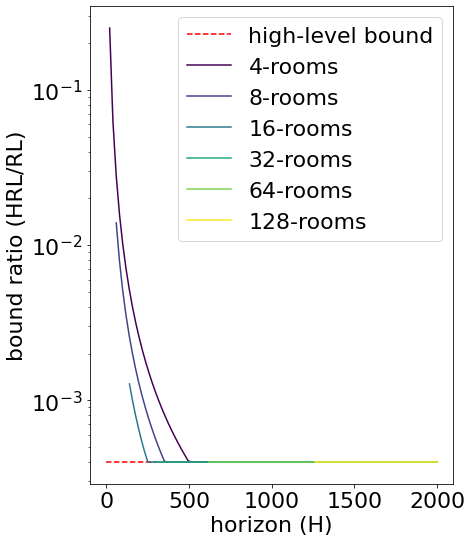

In [13]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 6)
# show how the horizon impact the bound

# plotting parameter
rs = 25                          # room size
nrs = [2**i for i in range(2,8)] # number of rooms
llh = 10                         # low-level horizon
grid = 101 

# compute & plot bound
def plot_bound(ax, params, color):
    rs, nr, llh, grid = params
    opt = ((nr/2)-2)*2 +2
    hs = np.linspace(opt*llh, 2e3, grid)
    hlhs = hs / llh # high-level horizons
    flat = np.array([rs*nr*4*h**2 for h in hs])
    hrl = np.array([max(rs*4*4*llh**2, nr*4*(h/llh)**2) for h in hs])
    threshold = [1/(rs*llh**2)] * grid
    x_threshold = np.linspace(0, 1e3, grid)
    ratio = hrl / flat
    ax.plot(hs, ratio, color=color, label=f"{nr}-rooms")

def plot_threshold(ax, params):
    rs, _, llh, grid = params
    threshold = [1/(rs*llh**2)] * grid
    x_threshold = np.linspace(0, 2e3, grid)
    ax.plot(x_threshold, threshold, linestyle='--', color='red', label='high-level bound')
    

fig, ax = plt.subplots(1,1, figsize=(7,8))

plot_threshold(ax, (rs, nr, llh, grid))
for i, nr in enumerate(nrs):
    plot_bound(ax, (rs, nr, llh, grid), viridis.colors[i])


ax.set_yscale('log')
ax.set_xlabel('horizon (H)')
ax.set_ylabel('bound ratio (HRL/RL)')
ax.legend()
plt.tight_layout()
plt.savefig("figures/ratio_vs_horizon.png")

[0.01     0.000625 0.0004   0.0004   0.0004  ]


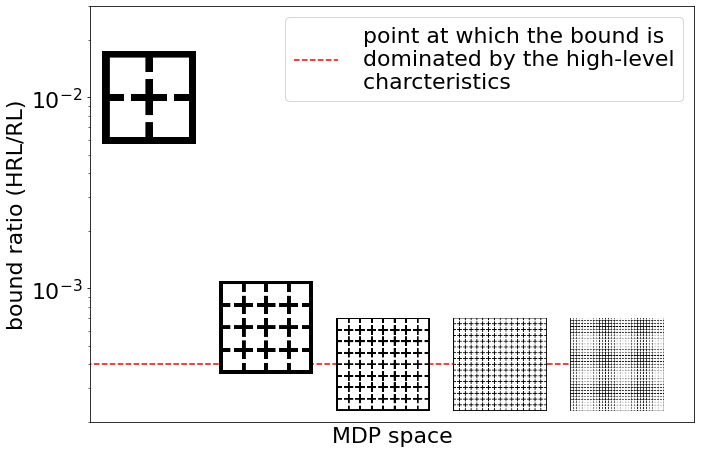

In [1]:
# make figures with mazes as marker
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
plt.rcParams.update({'font.size': 22})

# plotting parameter
rs = 25                             # room size
nrs = [2*2, 4*4, 8*8, 16*16, 32*32] # number of rooms
llh = 10                            # low-level horizon
hs = [100, 200, 1000, 2000, 10000]

def get_ratio(params):
    rs, nrs, llh, hs = params
    hlhs = np.array(hs) / llh # high-level horizons
    flat = np.array([rs*nr*4*h**2 for h, nr in zip(hs, nrs)])
    hrl = np.array([max(rs*4*4*llh**2, nr*4*(h/llh)**2) for h, nr in zip(hs, nrs)])
    ratio = hrl / flat
    return ratio

def plot_threshold(ax, params, grid=100):
    rs, llh = params
    threshold = [1/(rs*llh**2)] * grid
    x_threshold = np.linspace(-200, 1200, grid)
    ax.plot(x_threshold, threshold, linestyle='--', color='red', label=' point at which the bound is\n dominated by the high-level\n charcteristics')

def getImage(path):
   return OffsetImage(plt.imread(path, format="png"), zoom=.35)

paths = ['figures/marker2x2.png',
         'figures/marker4x4.png',
         'figures/marker8x8.png',
         'figures/marker16x16.png',
         'figures/marker32x32.png']

x = [0, 300, 600, 900, 1200]
y = get_ratio((rs, nrs, llh, hs))

print(y)
exit()
fig, ax = plt.subplots(1,1, figsize=(10,7))


for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

ax.set_xlim((-150, 1400))
ax.set_ylim((0.0002, 0.03))
ax.set_yscale('log')
ax.set_ylabel("bound ratio (HRL/RL)", fontsize=22)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plot_threshold(ax, (rs, llh))
ax.set_xlabel("MDP space", fontsize=22)
ax.legend(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.savefig("figures/bound_ratio_for_mazes.png")

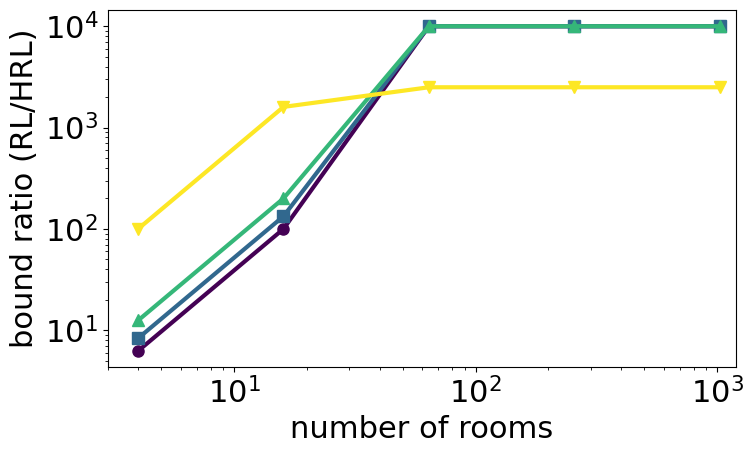

In [82]:
# make the same figure but for all env (with diff room profiles)
rs = 25                                       # room size
nrs = np.array([2*2, 4*4, 8*8, 16*16, 32*32]) # number of rooms

hs = np.array([100, 200, 1000, 2000, 10000])


def compute_curve(n_profiles, llh):
    rl_bound = rs * nrs * 4 * hs**2
    low_bound = [rs * 4 * 4 * n_profiles * llh**2] * len(hs)
    high_bound = nrs * 4 * (hs/llh)**2
    
    hrl_bound = [max(l, h) for l, h in zip(low_bound, high_bound)]
    #return hrl_bound/rl_bound, low_bound/rl_bound, high_bound/rl_bound
    return rl_bound/hrl_bound, rl_bound/low_bound, rl_bound/high_bound


# compute curve for 1 room profile
y1, low, high = compute_curve(1, 10)
y2, low, high = compute_curve(2, 20)
y3, low, high = compute_curve(3, 20)
y4, low, high = compute_curve(4, 20)

from matplotlib import cm
viridis = cm.get_cmap('viridis', 4)
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.plot(nrs, y4, label="4 room layouts", color=viridis.colors[0], linewidth=3, marker='o', markersize=8)
ax.plot(nrs, y3, label="3 room layouts", color=viridis.colors[1], linewidth=3, marker='s', markersize=8)
ax.plot(nrs, y2, label="2 room layouts", color=viridis.colors[2], linewidth=3, marker='^', markersize=8)
ax.plot(nrs, y1, label="1 room layout", color=viridis.colors[3], linewidth=3, marker='v', markersize=8)

#ax.plot(nrs, low, label="1 room profile low", color="red", linestyle="--", alpha=0.8, linewidth=3)
#ax.plot(nrs, high, label="1 room profile low", color="black", linestyle="--", alpha=0.8, linewidth=3)

ax.set_xlabel("number of rooms")
ax.set_ylabel("bound ratio (RL/HRL)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((3, 1200))
#ax.set_yscale('log')

#ax.arrow(x=40, y=10, dx=0, dy=1500, clip_on='False')
#ax.annotate("test", xy=(30, 20), rotation=90)

#ax.arrow(x=40, y=10, dx=800, dy=0, clip_on='False')
#ax.annotate("Increase complexity", xy=(150, 5), rotation=0)
#fig.canvas.draw()

#ax.legend()
plt.tight_layout()
plt.savefig("figures/bound_ratio_room_profiles.png")

In [6]:
ann = ax.annotate('', xy     = (r1[0], r1[1]), xycoords='data',
                      xytext = (r0[0], r0[1]), textcoords='data',
                      arrowprops=dict(arrowstyle="-|>"),
                      annotation_clip=False)
    ann.arrow_patch.set_clip_box(ax.bbox)

array([    10000,     40000,   1000000,   4000000, 100000000])

## Plot taxi environment

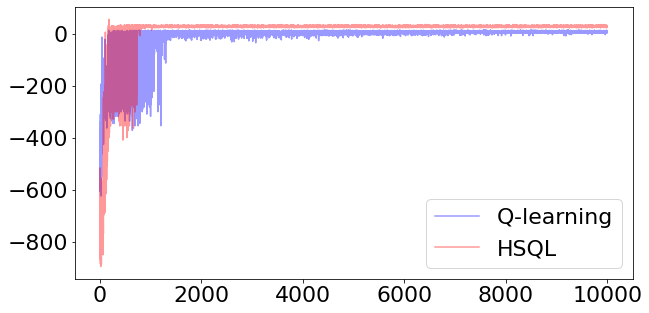

In [2]:
flat = np.load("./results/taxi_qlearning_rewards.npy")
hsql = np.load("./results/taxi_hsql_rewards.npy")

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(flat, color='blue', alpha=0.4, label='Q-learning')
ax.plot(hsql, color='red', alpha=0.4, label='HSQL')
plt.legend()

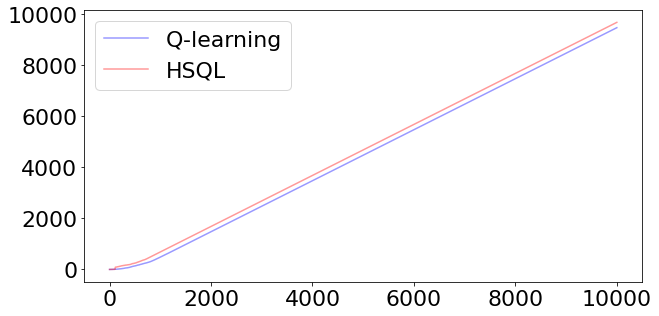

In [3]:
flat = np.load("./results/taxi_qlearning_successes.npy")
hsql = np.load("./results/taxi_hsql_successes.npy")

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(np.cumsum(flat), color='blue', alpha=0.4, label='Q-learning')
ax.plot(np.cumsum(hsql), color='red', alpha=0.4, label='HSQL')
plt.legend()

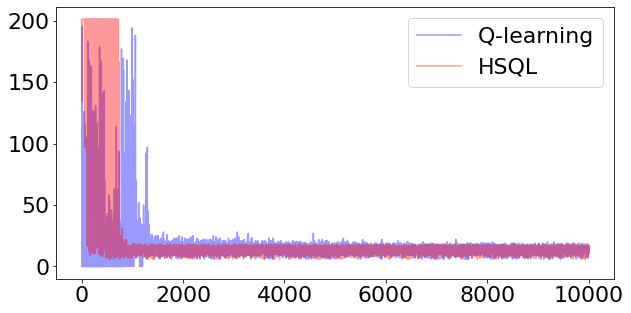

In [4]:

hsql = np.load("./results/taxi_hsql_steps.npy")

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(flat, color='blue', alpha=0.4, label='Q-learning')
ax.plot(hsql, color='red', alpha=0.4, label='HSQL')
plt.legend()

In [50]:
def get_stats(x):
    m = np.mean(x, axis=1)
    s = np.std(x, axis=1)
    return m, s

def plot_line(data, ax, color, curvename=None):
    mean, std = get_stats(data)
    episodes = np.arange(data.shape[0])
    ax.plot(mean, color=color, alpha=0.7, label=curvename)
    ax.fill_between(episodes, mean-std, mean+std, alpha=0.3, color=color)
    if not curvename is None:
        plt.legend(bbox_to_anchor=(0.4, 1))

In [51]:
Qlearning = np.load("./results/taxi/taxi_results_qlearning.npy")
hsql = np.load("./results/taxi/taxi_results_hsql.npy")
print(hsql.shape)


(5000, 8, 10)


[[-314. -659. -704. ... -681. -605. -630.]
 [-460. -455. -758. ... -686. -528. -677.]
 [-704. -305. -269. ... -314. -677. -571.]
 ...
 [  32.   25.   29. ...   29.   28.   35.]
 [  31.   32.   35. ...   27.   28.   35.]
 [  27.   29.   27. ...   35.   26.   29.]]


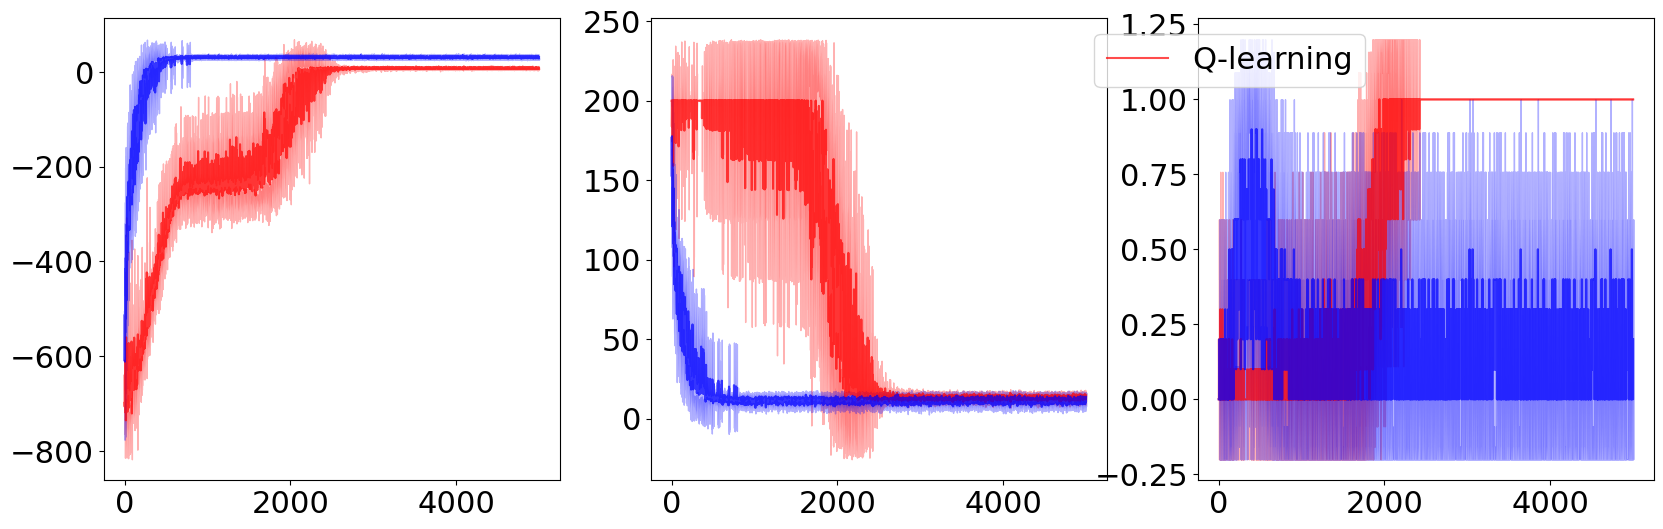

In [52]:
fig, ax = plt.subplots(1,3, figsize=(20,6))# reward, steps , success
plot_line(Qlearning[:, 0, :], ax[0], 'red')
plot_line(Qlearning[:, 1, :], ax[1], 'red')
plot_line(Qlearning[:, 2, :], ax[2], 'red', "Q-learning")

plot_line(hsql[:, 0, :], ax[0], 'blue')
plot_line(hsql[:, 7, :], ax[1], 'blue')
plot_line(hsql[:, 6, :], ax[2], 'blue')

print(hsql[:, 0, :])



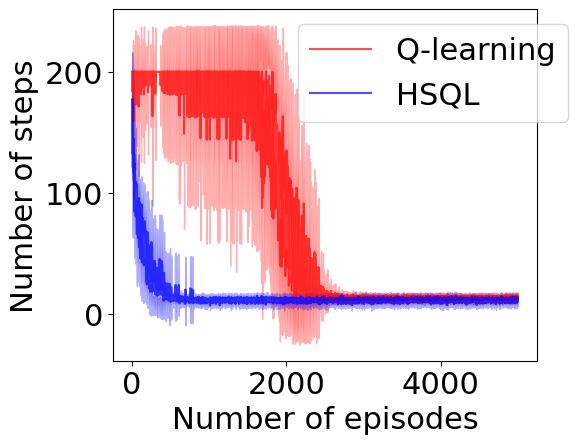

In [47]:
fig, ax = plt.subplots(1,1, figsize=(6,5))# reward, steps , success
#ax.grid('on')
plot_line(Qlearning[:5000, 1, :], ax, 'red', "Q-learning")
plot_line(hsql[:5000, 7, :], ax, 'blue', 'HSQL')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Number of episodes')


plt.tight_layout()
#plt.savefig('./figures/taxi_learning_curves.svg')

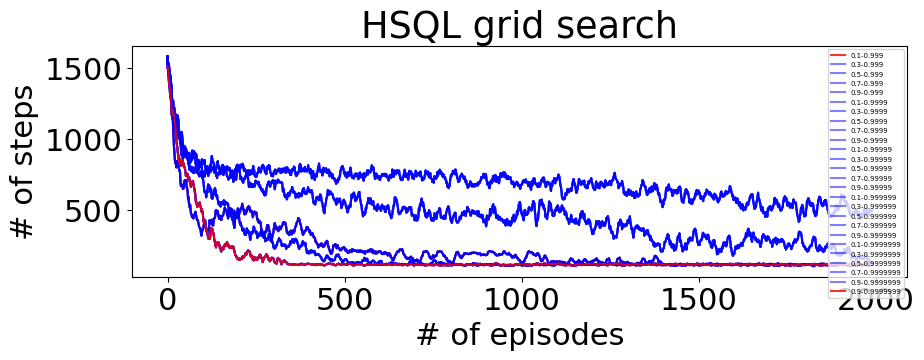

In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
decays = [1-1e-3, 1-1e-4, 1-1e-5, 1-1e-6, 1-1e-7]
decays = [1-1e-3, 1-1e-4, 1-1e-5, 1-1e-6, 1-1e-7]

epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]

fig, ax = plt.subplots(1,1, figsize=(10,3))


for d in decays:
    for ep in epsilons:
        #q = np.load(f"./results/taxi/taxi_results_eps_{ep}_decay_{d}_qlearning.npy")
        #mean, _ = get_stats(q[:2000, 1, :])
        #y = np.convolve(mean, np.ones(10), mode='valid')
        #if ep == 0.1 and d == 1-1e-3: 
        #    plt.plot(y, label=f"{ep}-{d}", color='red', alpha=0.8)
        #else:
        #    plt.plot(y, label=f"{ep}-{d}", color='blue', alpha=0.5)
        
        h = np.load(f"./results/taxi/taxi_results_eps_{ep}_decay_{d}_hsql.npy")
        mean, _ = get_stats(h[:2000, 7, :])
        y = np.convolve(mean, np.ones(10), mode='valid')
        
        if ep == 0.1 and d == 1-1e-3: 
            plt.plot(y, label=f"{ep}-{d}", color='red', alpha=0.8)
        else:
            plt.plot(y, label=f"{ep}-{d}", color='blue', alpha=0.5)
        
    

h = np.load(f"./results/taxi/taxi_results_eps_0.1_decay_0.9999_hsql.npy")
mean, _ = get_stats(h[:2000, 7, :])
y = np.convolve(mean, np.ones(10), mode='valid')
plt.plot(y, label=f"{ep}-{d}", color='red', alpha=0.8)

ax.set_xlabel("# of episodes")
ax.set_ylabel("# of steps")
ax.set_title("HSQL grid search")
plt.legend(fontsize=5)
plt.savefig("hsql-grid-search.png")

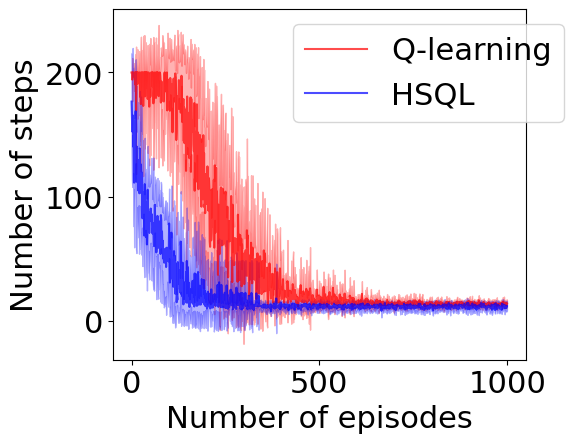

In [59]:
fig, ax = plt.subplots(1,1, figsize=(6,5))# reward, steps , success

h = np.load(f"./results/taxi/taxi_results_eps_0.1_decay_0.9999_hsql.npy")
q = np.load(f"./results/taxi/taxi_results_eps_0.1_decay_0.999_qlearning.npy")
plot_line(q[:1000, 1, :], ax, 'red', "Q-learning")
plot_line(h[:1000, 7, :], ax, 'blue', 'HSQL')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Number of episodes')


plt.tight_layout()

plt.savefig("figures/taxi_hsql_vs_qlearning.png")